## Customer Segmentation

Customer Segmentation is the process of dividing the customer base into clusters or groups. This division could be based on different factors like age, gender, income, geographical data or behavioural features like spending patterns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 200 entries and all the columns have no missing values.

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


So there are 4 numerical columns and one categorical columns. 

### Univariate Analysis

Lets break down each column and try to understand any patterns and their frequencies.

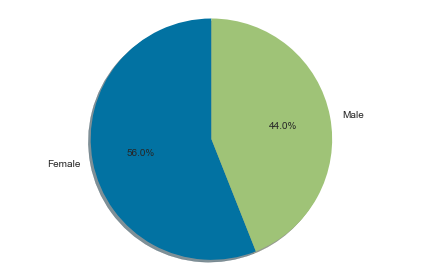

In [7]:
labels = data['Gender'].astype('category').cat.categories.tolist()
counts = data['Gender'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
plt.pie(sizes,autopct='%1.1f%%',labels=labels,shadow=True, startangle=90)
# View the plot drop above
plt.axis('equal')
# View the plot
plt.tight_layout()
plt.show()

Lets convert this categorical column to numeric quantities with a technique called "Label Encoding"

In [8]:
data['Gender'] = data['Gender'].astype('category').cat.codes

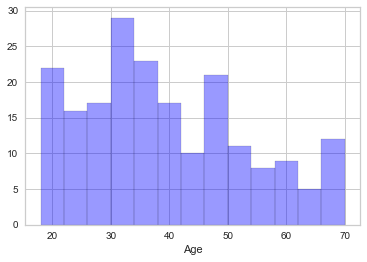

In [9]:
#sns.set_style("whitegrid")
sns.distplot(data['Age'], hist=True, kde=False, bins=int(52/4), color = 'blue', hist_kws={'edgecolor':'black'})

Most of the customers are between 20-50 age group with a peak number at 30-35 closely followed by 20-25 and 45-50 age groups.

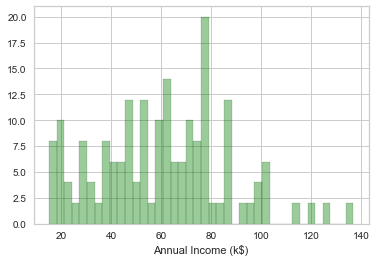

In [10]:
sns.distplot(data['Annual Income (k$)'], hist=True, kde=False, bins=40, color = 'green', hist_kws={'edgecolor':'black'})

This graph shows that most of the people have an income around 75-80k and 60-65k. There are very few or negligible number of people who earn more than 104k. 

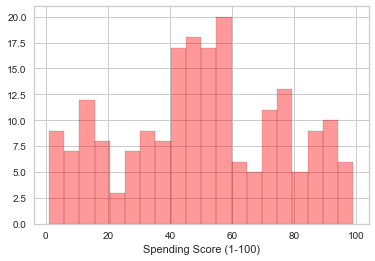

In [11]:
sns.distplot(data['Spending Score (1-100)'], hist=True, kde=False, bins=20, color = 'red', hist_kws={'edgecolor':'black'})

This graph indicates that most of the customers have a spending limit between 40-60 with the peak at 55-60.

### Bivariate Analysis

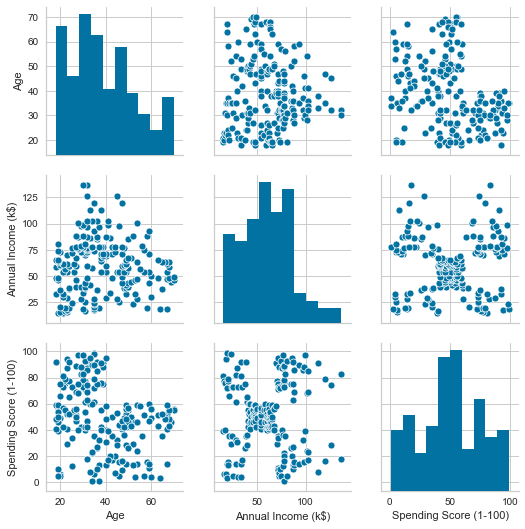

In [12]:
sns.pairplot(data.drop(['CustomerID','Gender'],axis=1))

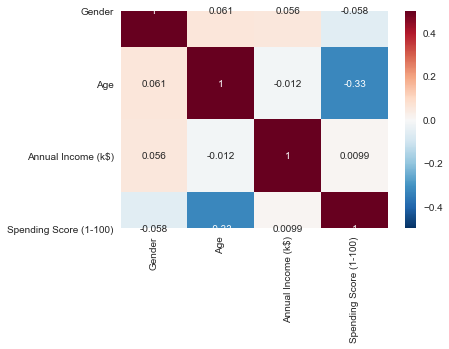

In [14]:
corrmat = data.drop('CustomerID',axis=1).corr()
#f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat,cmap='RdBu_r',annot=True,vmax=0.5,vmin=-0.5)

The only correlation that we can find is between Age and Spending Score which is a negative correlation which means that customers who are younger have a tendency to spend more. However, this correlation is not really strong and we may have to dig deep and see if there any other patterns.

#### Age vs Spending Score

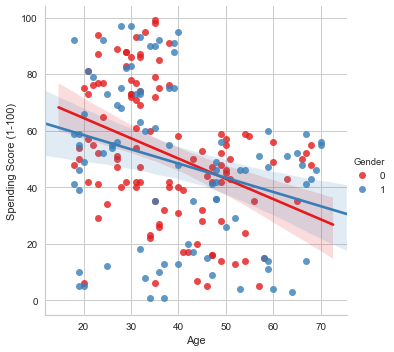

In [15]:
sns.lmplot(x="Age", y="Spending Score (1-100)", hue="Gender", palette="Set1", data=data)

#### Annual Income vs Spending Score

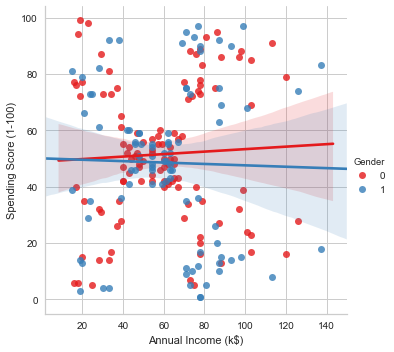

In [16]:
sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="Set1", data=data)

#### Age vs Annual Income

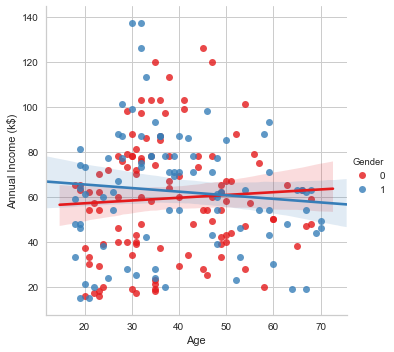

In [17]:
sns.lmplot(x="Age", y="Annual Income (k$)", hue="Gender", palette="Set1", data=data)

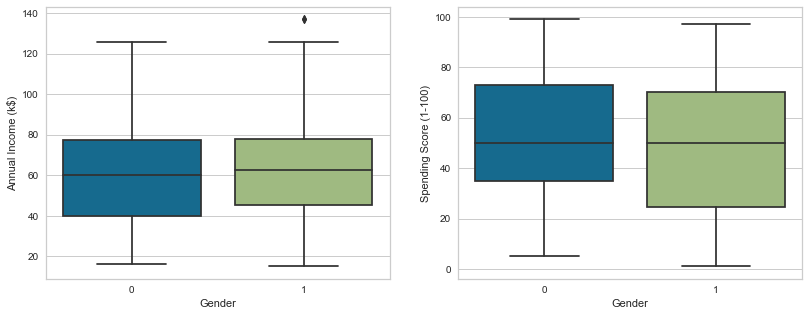

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
plt.subplots_adjust(right=1.0)
sns.boxplot(x="Gender", y="Annual Income (k$)", data=data, ax=ax1)
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=data, ax= ax2)

### KMeans Clustering

#### Clustering based on Spending Score and Annual Income

For KMeans clustering, the Elbow method can be used to find the optimal number of clusters. Instead of writing the code from scratch, we can use the Yellowbrick library to find the optimal number of clusters.

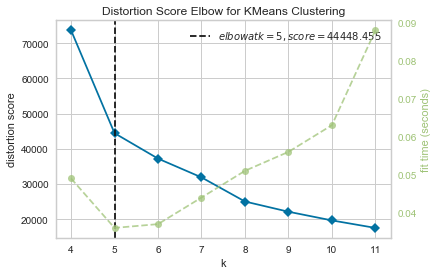

In [19]:
X= data.iloc[:, [3,4]].values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

As seen in the graph, 5 is the optimal number of clusters when 2 columns are considered.

In [20]:
kmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y= kmodel.fit_predict(X)

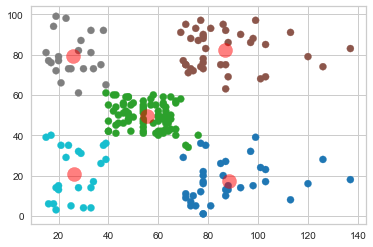

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab10')
centers = kmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In the graph, each color represents each cluster and the red dot indicates the centroid of each cluster. There are 5 clusters and they can be categorized as:
    - Low Income with Low Spending Score
    - Low Income with High Spending Score
    - Average Income with Average Spending Score
    - High Income with Low Spending Score
    - High Income with High Spending Score

#### Clustering based on Age, Spending Score and Annual Income

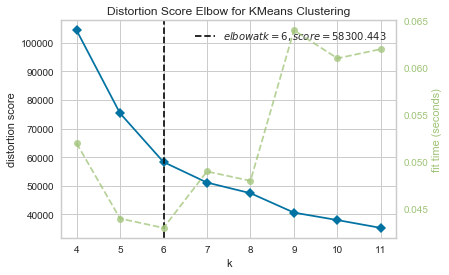

In [22]:
X1= data.iloc[:, [2,3,4]].values
age_model = KMeans()
visualizer = KElbowVisualizer(age_model, k=(4,12))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show()  

In this case, the optimal number of clusters is 6.

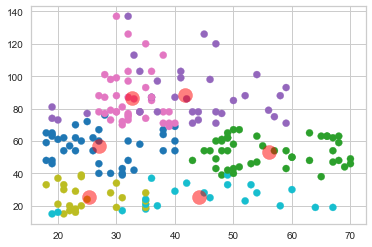

In [26]:
k_age_model = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y1= k_age_model.fit_predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='tab10')

centers = k_age_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);